# Prophet model from facebook to be used in time series analysis

In [18]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
# import the dataset
df = pd.read_csv("D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\Daily climate data\DailyDelhiClimateTrain.csv", index_col="date", parse_dates=True)
print(df.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [21]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='date', ylabel='meantemp'>

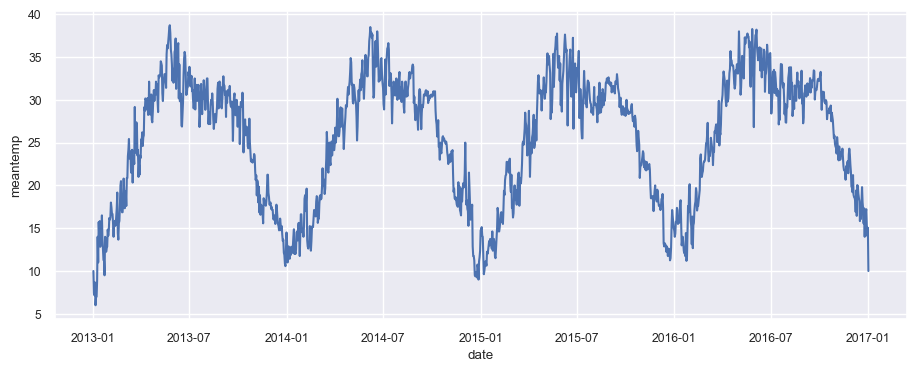

In [22]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df, x="date", y="meantemp")


c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

<Axes: xlabel='date', ylabel='humidity'>

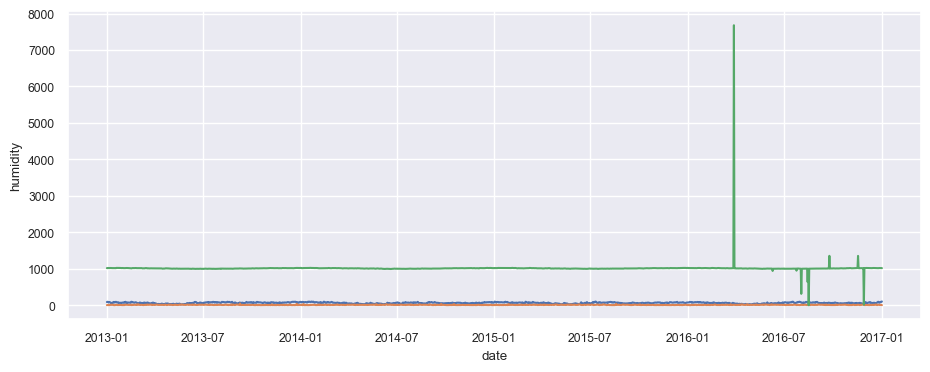

In [23]:
sns.lineplot(data=df, x="date", y="humidity")
sns.lineplot(data=df, x="date", y="wind_speed")
sns.lineplot(data=df, x="date", y="meanpressure")

In [24]:
# draw same plot on plotly
fig = px.line(df, x=df.index, y="meanpressure", title='Mean Pressure')
fig.show()

In [25]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [26]:
fig = px.line(df, x=df.index, y="meantemp", title='Mean temperature')
fig.show()

In [39]:
fig1=px.scatter(df, x="meantemp", y="humidity", title='Mean temperature vs Humidity', 
                trendline='ols', trendline_color_override='red')
fig1.show()

In [32]:
from scipy.stats import pearsonr
pearsonr(df['meantemp'], df['humidity'])

PearsonRResult(statistic=-0.5719507155817221, pvalue=8.965893710176129e-128)

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



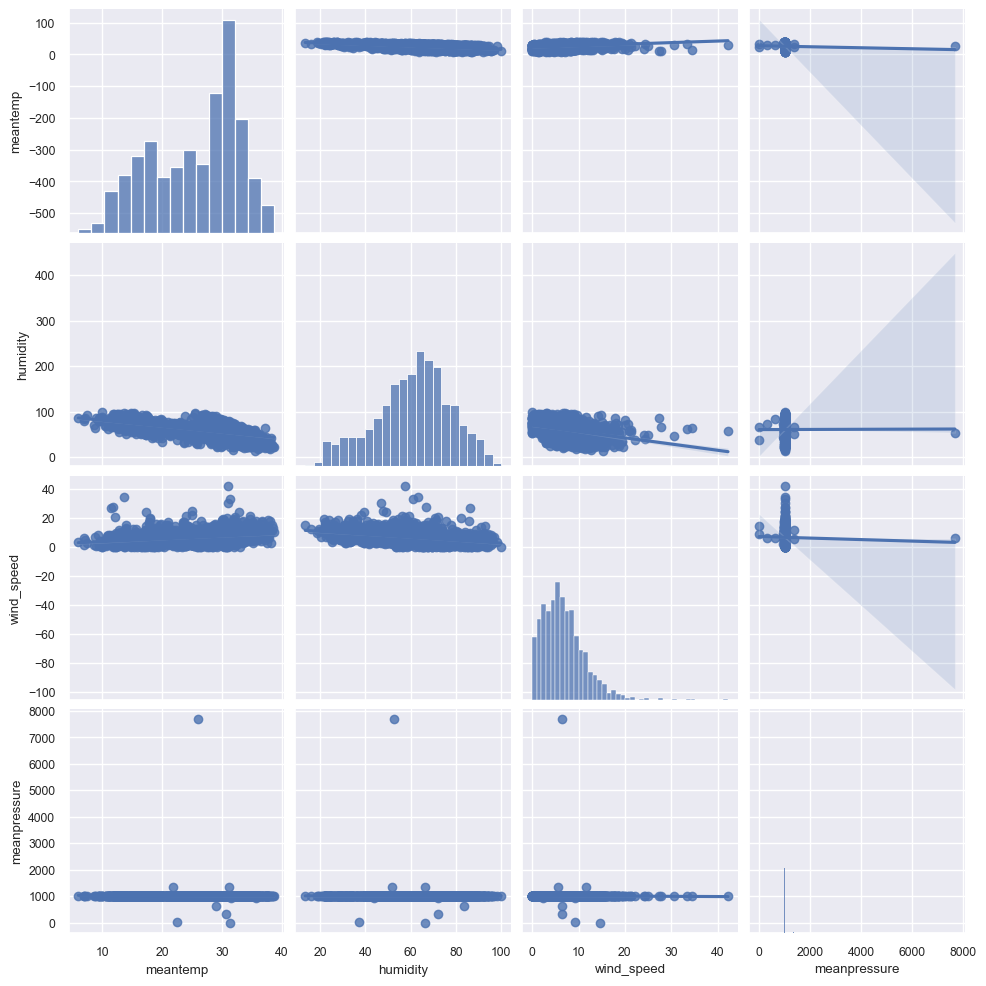

In [34]:
sns.pairplot(df, kind='reg')

<Axes: >

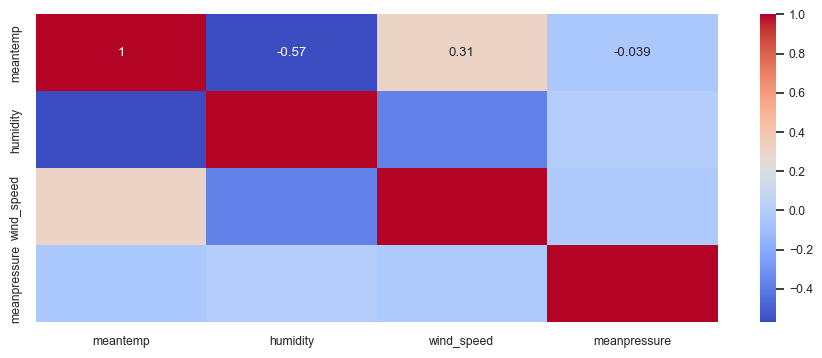

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [37]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.595933,0.546868,0.161113,0.132009
std,0.224614,0.193709,0.108044,0.023460
min,0.000000,0.000000,0.000000,0.000000
25%,0.393013,0.426774,0.082307,0.130770
50%,0.663755,0.568276,0.147363,0.131679
75%,0.773540,0.679094,0.218812,0.132509
max,1.000000,1.000000,1.000000,1.000000


c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\adeel\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

<Axes: xlabel='date', ylabel='meantemp'>

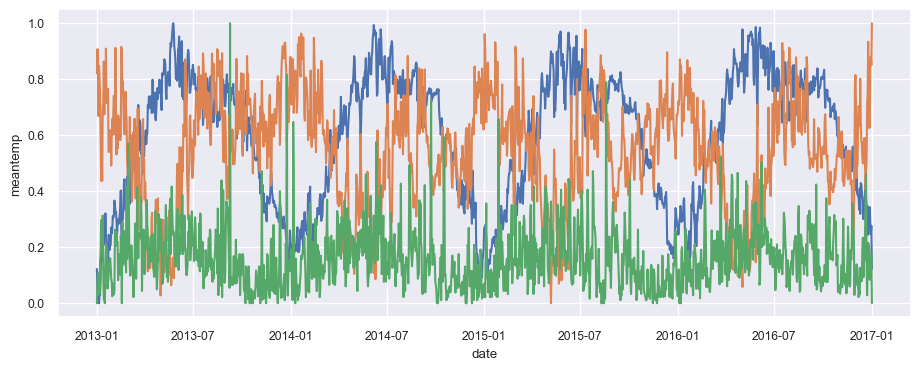

In [40]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
# sns.lineplot(data=df_scaled, x="date", y="meanpressure")